# 0 TCLab Overview

The following cells in this notebook demonstrate the use of the Temperature Control Lab.

## Imports

In [1]:
import time
import sys

sys.path.append("../TCLab")
from TCLab import TCLab

## Connecting

In [2]:
a = TCLab()

Opening connection
TCLab connected via Arduino on port /dev/tty.wchusbserial1410


## Reading Temperatures

In [3]:
a.version

'TClab Firmware Version 0.03'

In [4]:
print("Temperature 1: {0:0.2f} C".format(a.T1))
print("Temperature 2: {0:0.2f} C".format(a.T2))

Temperature 1: 25.09 C
Temperature 2: 24.44 C


## Setting Heaters

In [5]:
print("Starting Temperature 1: {0:0.2f} C".format(a.T1))
print("Starting Temperature 2: {0:0.2f} C".format(a.T2))

Theat = 30
a.Q1 = 100
a.Q2 =  50

print()
print("Set Heater 1:", a.Q1, "mV")
print("Set Heater 2:", a.Q2, "mV")

print("\nHeat for", Theat, "seconds")
for k in range(0,int(Theat)):
    print('.',end='',flush=True)
    time.sleep(1)
print()

print("Turn Heaters Off")
a.Q1 = 0
a.Q2 = 0

print()
print("Final Temperature 1: {0:0.2f} C".format(a.T1))
print("Final Temperature 2: {0:0.2f} C".format(a.T2))

Starting Temperature 1: 25.09 C
Starting Temperature 2: 24.44 C

Set Heater 1: 100 mV
Set Heater 2: 50 mV

Heat for 30 seconds
..............................
Turn Heaters Off

Final Temperature 1: 31.86 C
Final Temperature 2: 27.99 C


## Logging Data

In [6]:
a.start()

a.Q1 = 100
a.Q2 =  50
print("Set Heater 1 to {0:d} mV".format(a.Q1))
print("Set Heater 2 to {0:d} mV".format(a.Q2))
sfmt = "   {0:3d} sec:   T1 = {1:0.2f} C    T2 = {2:0.2f} C"
for i in range(0,65,5):
    print(sfmt.format(i, a.T1, a.T2), flush=True)
    time.sleep(5)

a.Q1 = 0
a.Q2 = 0
print()
print("Set Heater 1 to {0:d} mV".format(a.Q1))
print("Set Heater 2 to {0:d} mV".format(a.Q2))
for i in range(65,125,5):
    print(sfmt.format(i, a.T1, a.T2), flush=True)
    time.sleep(5)
    
a.stop()

Set Heater 1 to 100 mV
Set Heater 2 to 50 mV
     0 sec:   T1 = 33.14 C    T2 = 28.96 C
     5 sec:   T1 = 35.08 C    T2 = 31.21 C
    10 sec:   T1 = 37.01 C    T2 = 31.21 C
    15 sec:   T1 = 38.95 C    T2 = 32.18 C
    20 sec:   T1 = 40.88 C    T2 = 34.76 C
    25 sec:   T1 = 43.13 C    T2 = 34.76 C
    30 sec:   T1 = 45.39 C    T2 = 37.33 C
    35 sec:   T1 = 47.32 C    T2 = 37.33 C
    40 sec:   T1 = 49.58 C    T2 = 40.23 C
    45 sec:   T1 = 51.84 C    T2 = 40.23 C
    50 sec:   T1 = 53.77 C    T2 = 43.13 C
    55 sec:   T1 = 56.03 C    T2 = 43.13 C
    60 sec:   T1 = 58.28 C    T2 = 44.10 C

Set Heater 1 to 0 mV
Set Heater 2 to 0 mV
    65 sec:   T1 = 59.89 C    T2 = 46.04 C
    70 sec:   T1 = 61.83 C    T2 = 47.00 C
    75 sec:   T1 = 63.12 C    T2 = 48.29 C
    80 sec:   T1 = 63.44 C    T2 = 49.26 C
    85 sec:   T1 = 64.08 C    T2 = 49.58 C
    90 sec:   T1 = 64.08 C    T2 = 49.90 C
    95 sec:   T1 = 64.08 C    T2 = 50.22 C
   100 sec:   T1 = 63.44 C    T2 = 50.55 C
   105 se

'Stop'

## Plotting the Log

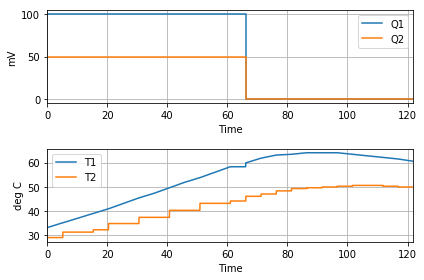

In [7]:
%matplotlib inline
a.plot()

## Realtime Plotting with Simpy

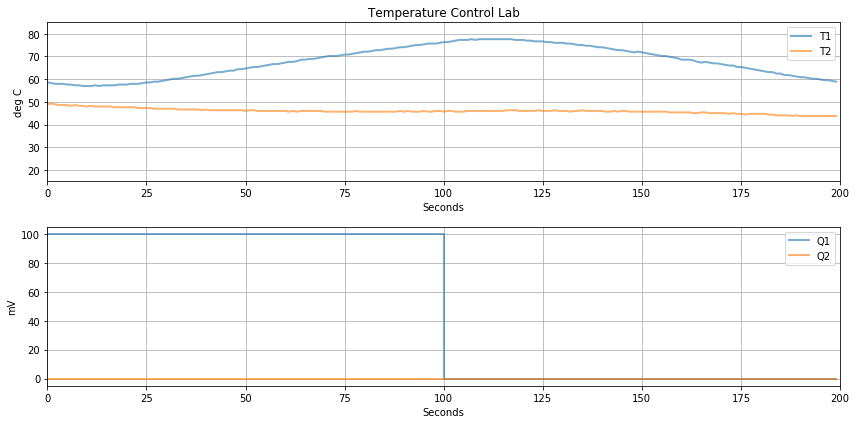

In [8]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
from IPython import display
import simpy.rt

import sys
sys.path.append('../TCLab')
from TCLab import TCLab

tf = 200

# create an empty plot, and keep the line object around
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
line_T1, = plt.plot([],[],lw=2,alpha=0.6)
line_T2, = plt.plot([],[],lw=2,alpha=0.6)
plt.xlim(0,tf)
plt.ylim(15,85)
plt.title('Temperature Control Lab')
plt.ylabel('deg C')
plt.xlabel('Seconds')
plt.legend(['T1','T2'])
plt.grid()

plt.subplot(2,1,2)
line_Q1, = plt.step([],[],where='post',lw=2,alpha=0.6)
line_Q2, = plt.step([],[],where='post',lw=2,alpha=0.6)
plt.xlim(0,tf)
plt.ylim(-5,105)
plt.ylabel('mV')
plt.xlabel('Seconds')
plt.legend(['Q1','Q2'])
plt.grid()

plt.tight_layout()

# define a function that appends to the plot
def rt_plotter(env,a):
    while True:
        tp = env.now
        line_T1.set_xdata(np.append(line_T1.get_xdata(),tp))
        line_T1.set_ydata(np.append(line_T1.get_ydata(),a.T1))
        line_T2.set_xdata(np.append(line_T2.get_xdata(),tp))
        line_T2.set_ydata(np.append(line_T2.get_ydata(),a.T2))
        line_Q1.set_xdata(np.append(line_Q1.get_xdata(),tp))
        line_Q1.set_ydata(np.append(line_Q1.get_ydata(),a.Q1))
        line_Q2.set_xdata(np.append(line_Q2.get_xdata(),tp))
        line_Q2.set_ydata(np.append(line_Q2.get_ydata(),a.Q2))
        display.clear_output(wait=True)
        display.display(plt.gcf())
        yield env.timeout(1)
        
def heaters(env,a):
    while True:
        try:
            a.Q1 = 100 if env.now < 100 else 0
            a.Q2 = 0
            yield env.timeout(10)
        except:
            a.stop()
            plt.close()
        
a = TCLab()
a.start()

env = simpy.rt.RealtimeEnvironment()
env.process(heaters(env,a))
env.process(rt_plotter(env,a))
env.run(until=tf)

# shutdown TC Lab and close the plot
a.stop()
plt.close()